In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hashlib

from methods import model, dists
from batch_runner import run_simulation  # o il nome del tuo file se diverso

# Fixed seed for copula-based sampling (pycop)
np.random.seed(42)

# Fixed generator for all other randomness
rng = np.random.default_rng(seed=42)


In [2]:
params = {
    "s": 5,
    "spending_rate": (
        "uniform", 
        [0, 1], 
        lambda N, rng: rng.uniform(1e-16, 1, N)
    ),
    "initial_balance": (
        "constant", 
        [1000], 
        lambda N, rng: 1000 * np.ones(N)
    ),
    "decimals": 3,
    "copula": ("joe", 3.15, False),
    "activity_distribution": (
        "powlaw", 
        [1.85, 1, 1838], 
        lambda unif: dists.powlaw_ppf(1.85, 1, 1838)(unif)
    ),
    "attractivity_distribution": (
        "powlaw", 
        [1.87, 1, 2118], 
        lambda unif: dists.powlaw_ppf(1.87, 1, 2118)(unif)
    ),
    "N": 500,
    "T": 50,
    "D": 50 / 43706315,
    "SIZE_SCALE": 1,
    "LENGTH_SCALE": 6,
    "MEAN_IET": 43706315,
    "burstiness": 0.5,
}


In [3]:
saved = 20

transactions_df, metadata, execution_time, nodes_df = run_simulation(
    params,
    saved=saved,
    rng=rng
)

print(f"Simulation completed in {execution_time:.2f} seconds")


Simulation completed in 0.06 seconds


,timestamp,source,target,amount,source_bal,target_bal
0,21052.822489,340,248,34.531,965.469,421.954
1,21663.551927,499,441,452.512,547.488,2399.663
2,21664.011229,499,248,413.413,134.075,835.367
3,22445.793682,495,364,572.472,427.528,1842.019
4,23692.446070,440,475,990.544,9.456,3127.617


,index,act_pot,att_pot,act,att,spr,iet
0,0,1.562782,1.077460,3.575643e-08,0.000228,0.773956,"(0.5, 0.5)"
1,1,28.577070,26.824492,6.538430e-07,0.005673,0.438878,"(0.5, 0.5)"
2,2,3.152324,6.670279,7.212514e-08,0.001411,0.858598,"(0.5, 0.5)"
3,3,3.736399,3.130062,8.548877e-08,0.000662,0.697368,"(0.5, 0.5)"
4,4,1.537638,1.819288,3.518115e-08,0.000385,0.094177,"(0.5, 0.5)"


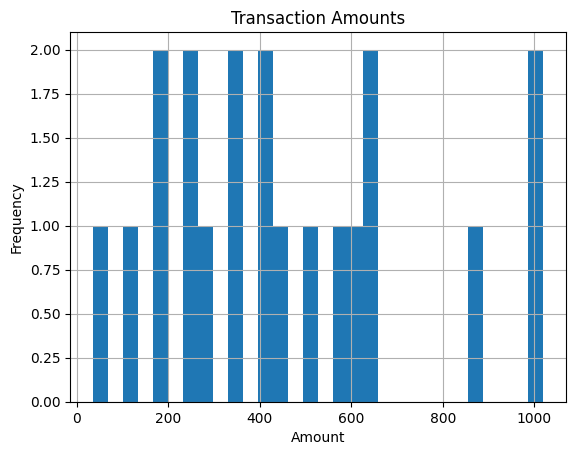

In [13]:
display(transactions_df.head())
display(nodes_df.head())

plt.hist(transactions_df["amount"], bins=30)
plt.title("Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
